In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Создание датасетов с помощью make_classification 

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data1, data1_y, = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)
data2, data2_y, = make_classification(n_samples=400, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=200)
data3, data3_y, = make_classification(n_samples=800, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=34)

# Работа с датасетами

## Работа с data1

### Визуализация

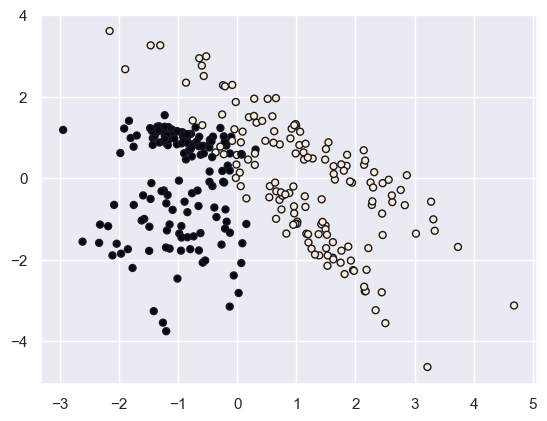

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

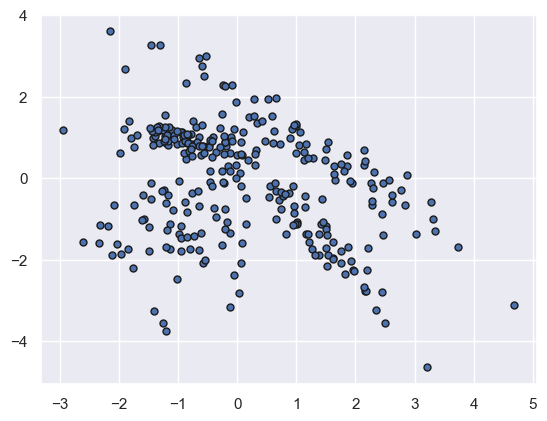

In [4]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

### Кластеризация

#### K-means

In [5]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(2, n_init='auto').fit(data1)

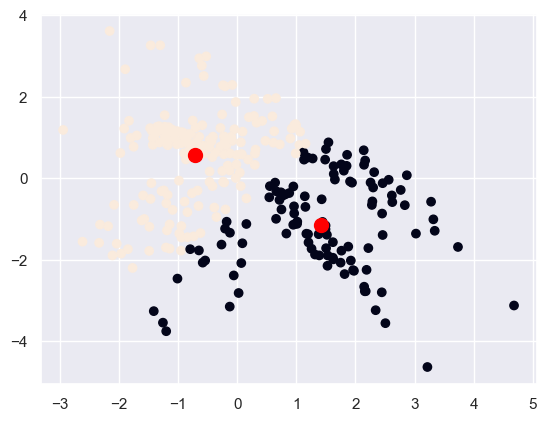

In [6]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

Оценка модели 

In [7]:
from sklearn.metrics.cluster import rand_score

rand_score(kmeans1.labels_, data1_y)

0.6305239687848383

In [8]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(kmeans1.labels_, data1_y)

0.6405833175789405

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(data1, kmeans1.labels_)

0.43210036054559814

In [10]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data1, kmeans1.labels_)

0.9199612652833394

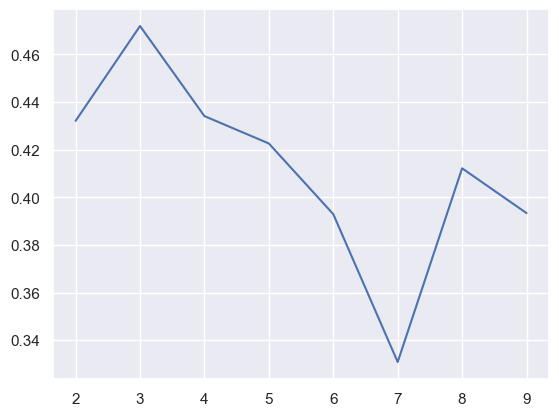

In [11]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

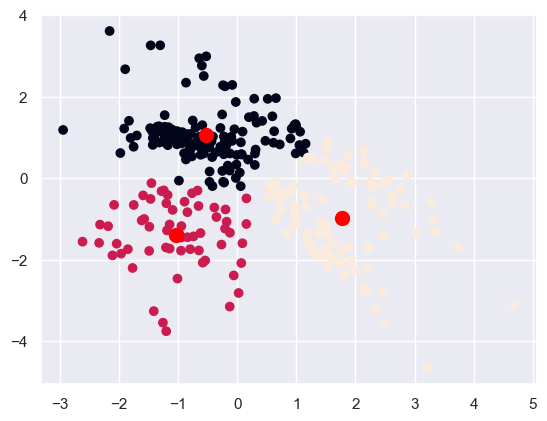

In [12]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(3, n_init='auto').fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

### AffinityPropagation

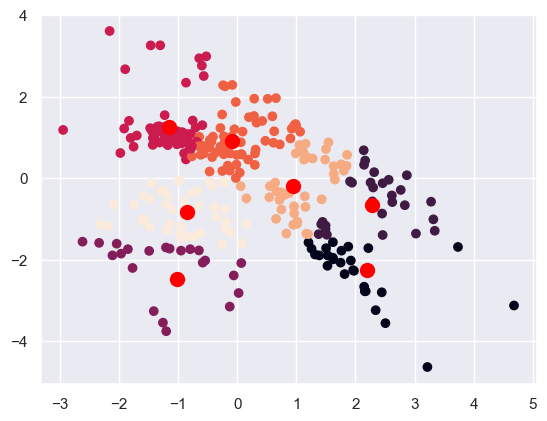

In [13]:
from sklearn.cluster import AffinityPropagation

clustering1 = AffinityPropagation(preference=-42).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [14]:
from sklearn.metrics.cluster import rand_score

rand_score(clustering1.labels_, data1_y)

0.5888517279821628

In [15]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(clustering1.labels_, data1_y)

0.43873620964248644

In [16]:
from sklearn.metrics import silhouette_score

silhouette_score(data1, clustering1.labels_)

0.33160227310328466

In [17]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data1, clustering1.labels_)

1.0794850525596602

### DB-SCAN

[-1  0]


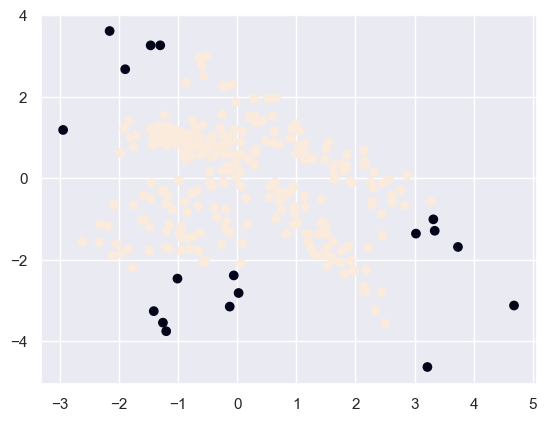

In [18]:
from sklearn.cluster import DBSCAN

dbscan1 = DBSCAN().fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

[-1  0  1  2  3  4  5]


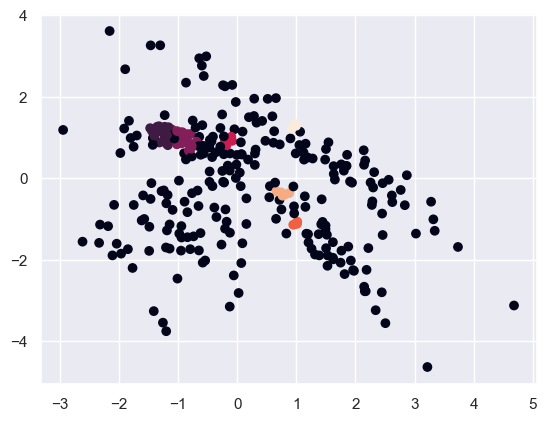

In [19]:
dbscan1 = DBSCAN(eps=0.1, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [20]:
from sklearn.neighbors import NearestNeighbors

nbrs1 = NearestNeighbors(n_neighbors=4).fit(data1)
distances1, indices1 = nbrs1.kneighbors(data1)
distances1

array([[0.        , 0.14075262, 0.36792915, 0.44996652],
       [0.        , 0.03239929, 0.03600522, 0.07527797],
       [0.        , 0.11009673, 0.19382091, 0.21479119],
       ...,
       [0.        , 0.28260111, 0.32034932, 0.33287071],
       [0.        , 0.03065035, 0.05157891, 0.06290576],
       [0.        , 0.05460523, 0.06462845, 0.07566198]])

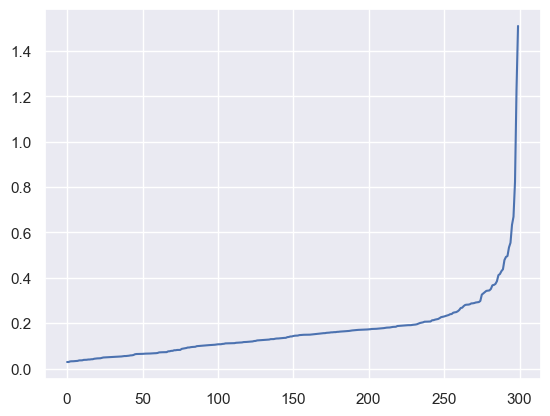

In [21]:
distances1 = np.mean(distances1, axis=1)
distances1 = np.sort(distances1)
# distances1
plt.plot(distances1)

[-1  0  1  2  3  4  5]


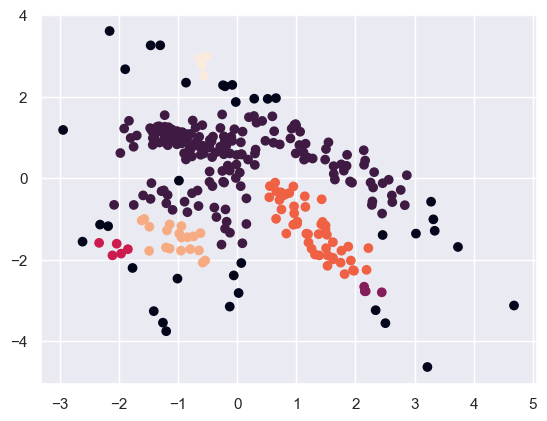

In [22]:
dbscan1 = DBSCAN(eps=0.35, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [23]:
from sklearn.metrics.cluster import rand_score

rand_score(dbscan1.labels_, data1_y)

0.5492084726867336

In [24]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(dbscan1.labels_, data1_y)

0.5089764296704711

In [25]:
from sklearn.metrics import silhouette_score

silhouette_score(data1, dbscan1.labels_)

0.07574821496511006

In [26]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data1,  dbscan1.labels_)

2.2951290436956535

### Gaussian Mixtures, EM

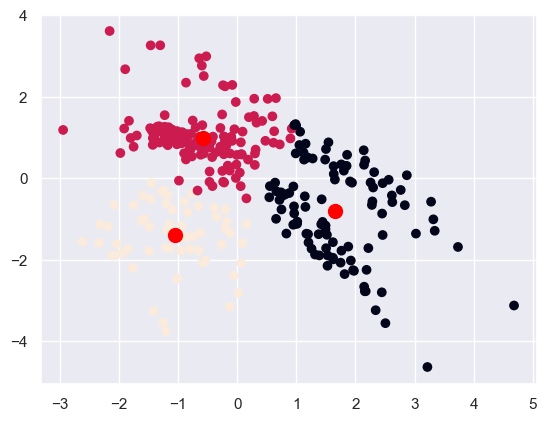

In [27]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=3).fit(data1)

gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=gm1.predict(data1))
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

In [28]:
from sklearn.metrics.cluster import rand_score

rand_score(gm1.predict(data1), data1_y)

0.6737346711259755

In [29]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(gm1.predict(data1), data1_y)

0.6302100754549465

In [30]:
from sklearn.metrics import silhouette_score

silhouette_score(data1,gm1.predict(data1))

0.4646140976155251

In [31]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data1,  gm1.predict(data1))

0.7448119337644922

### Иерархическая кластеризация

In [32]:
from scipy.cluster import hierarchy

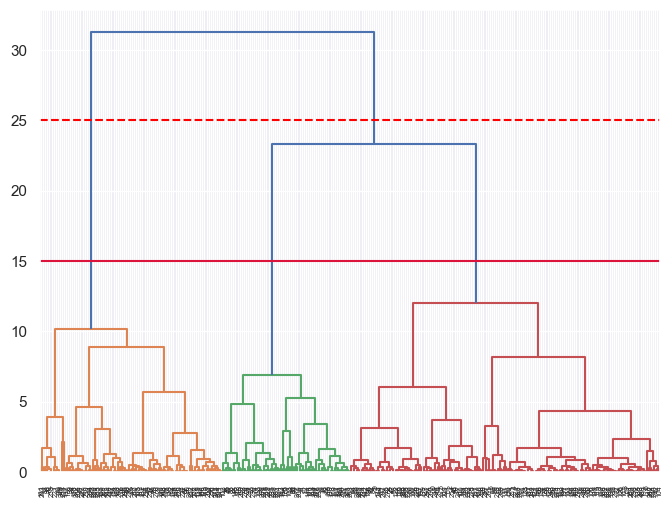

In [33]:
clusters1 = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters1)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(25, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(15, color='crimson');

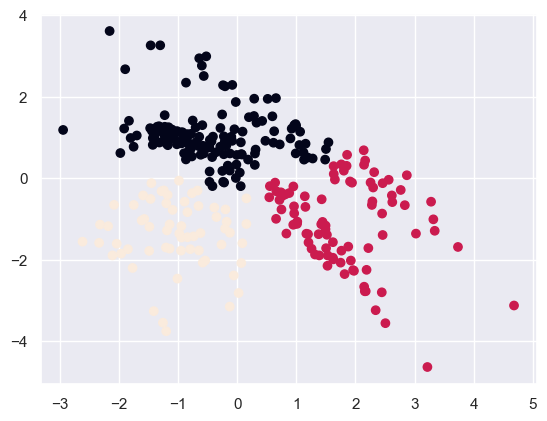

In [34]:
from sklearn.cluster import AgglomerativeClustering

clustering1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)

### Карты Кохонена

In [35]:
!pip install sklearn_som

In [36]:
from sklearn_som.som import SOM

In [37]:
iris_som1 = SOM(m=2, n=1, dim=2)
iris_som1.fit(data1)

In [38]:
predictions = iris_som1.predict(data1)

In [39]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], d

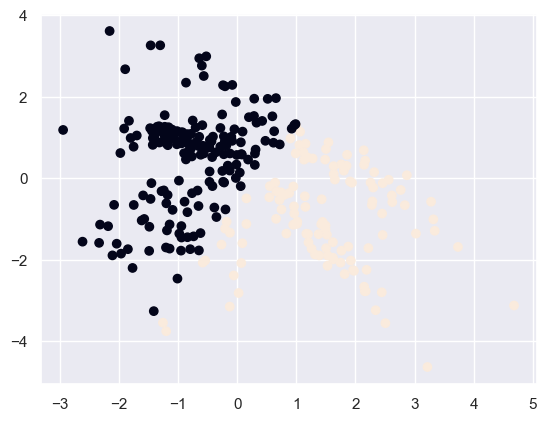

In [40]:
plt.scatter(data1[:,0], data1[:,1], c=predictions)

## Работа с data2

### Визуализация

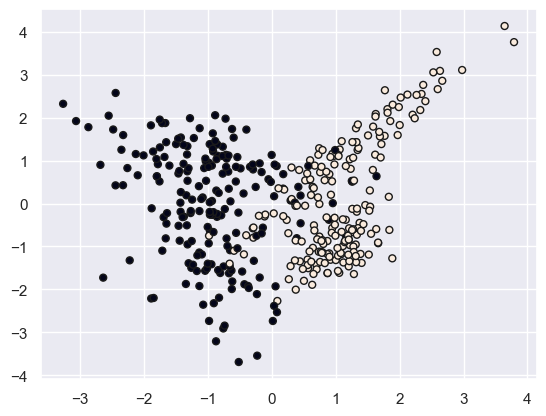

In [41]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

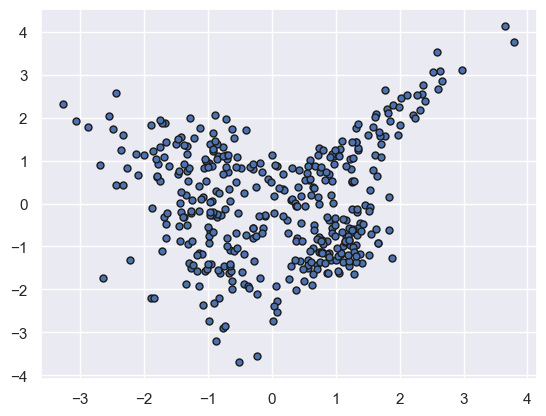

In [42]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

### Кластеризация

#### K-means

In [43]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(2, n_init='auto').fit(data2)

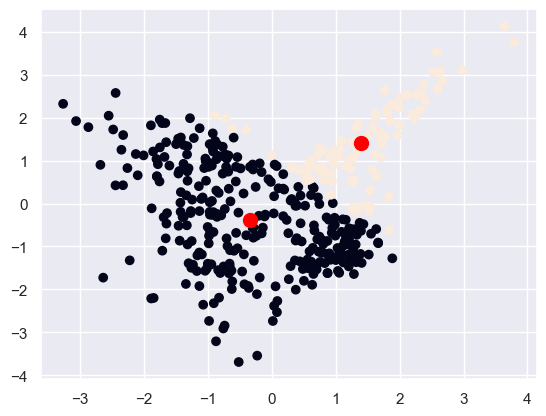

In [44]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

Оценка модели 

In [45]:
from sklearn.metrics.cluster import rand_score

rand_score(kmeans2.labels_, data2_y)

0.5692355889724311

In [46]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(kmeans2.labels_, data2_y)

0.6274362933024512

In [47]:
from sklearn.metrics import silhouette_score

silhouette_score(data2, kmeans2.labels_)

0.33803636405926285

In [48]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data2, kmeans2.labels_)

1.0043616334085532

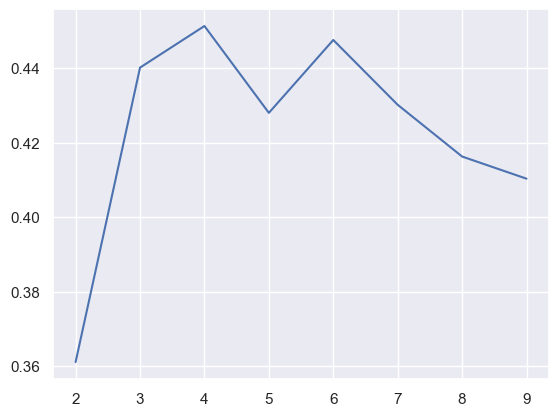

In [49]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

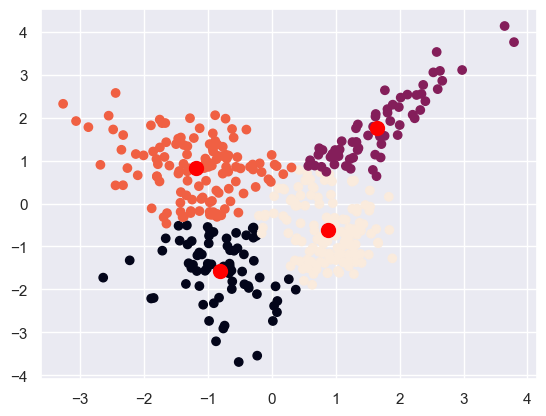

In [50]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(4, n_init='auto').fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

### AffinityPropagation

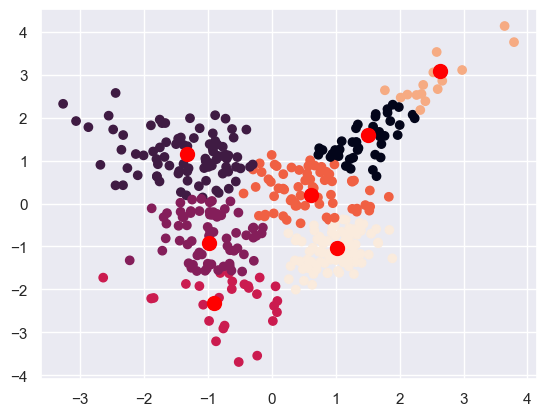

In [51]:
from sklearn.cluster import AffinityPropagation

clustering2 = AffinityPropagation(preference=-42).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

In [52]:
from sklearn.metrics.cluster import rand_score

rand_score(clustering2.labels_, data2_y)

0.6283959899749374

In [53]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(clustering2.labels_, data2_y)

0.5105812221092567

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score(data2, clustering2.labels_)

0.41022663277836335

In [55]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data2, clustering2.labels_)

0.7727483209204948

### DB-SCAN

[-1  0]


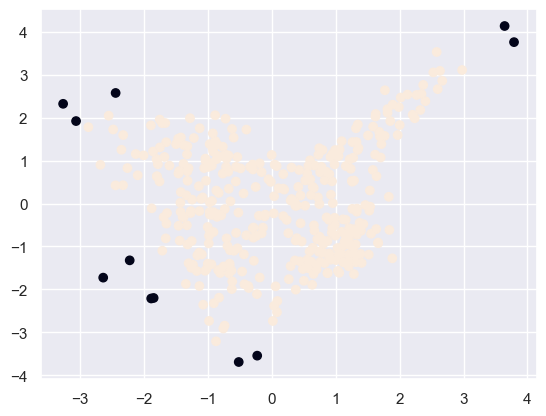

In [56]:
from sklearn.cluster import DBSCAN

dbscan2 = DBSCAN().fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

[-1  0  1  2  3  4  5  6  7]


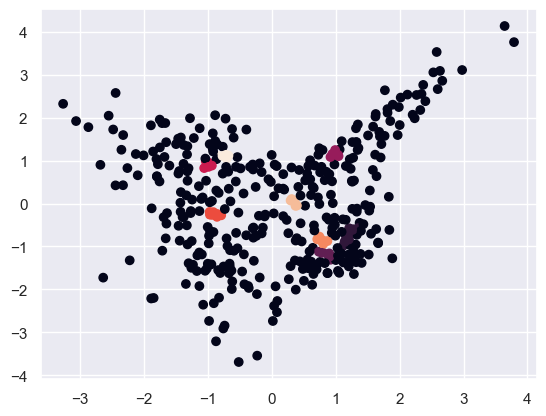

In [57]:
dbscan2 = DBSCAN(eps=0.1, min_samples=4).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [58]:
from sklearn.neighbors import NearestNeighbors

nbrs2 = NearestNeighbors(n_neighbors=4).fit(data2)
distances2, indices2 = nbrs1.kneighbors(data2)
distances2

array([[0.66883616, 0.68688078, 0.75448209, 0.99340881],
       [0.09119347, 0.10380919, 0.23046984, 0.23129567],
       [0.2234146 , 0.38274008, 0.45422659, 0.46982824],
       ...,
       [0.11620811, 0.2089668 , 0.21994231, 0.24809115],
       [0.39871774, 0.67029687, 0.76636641, 0.88266142],
       [0.04163029, 0.10367793, 0.15542327, 0.28073073]])

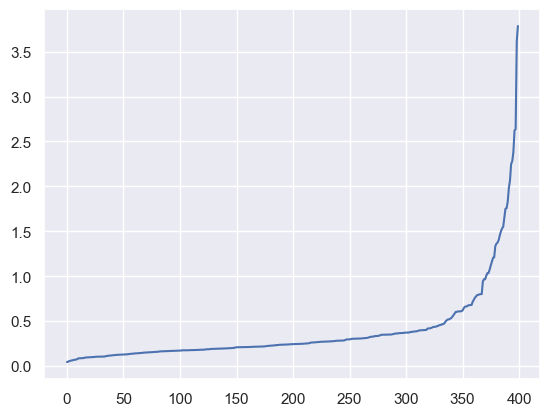

In [59]:
distances2 = np.mean(distances2, axis=1)
distances2 = np.sort(distances2)
# distances2
plt.plot(distances2)

[-1  0]


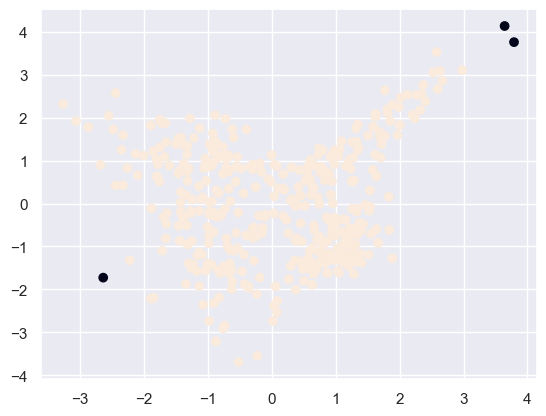

In [60]:
dbscan2 = DBSCAN(eps=0.75, min_samples=4).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [61]:
from sklearn.metrics.cluster import rand_score

rand_score(dbscan2.labels_, data2_y)

0.4987593984962406

In [62]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(dbscan2.labels_, data2_y)

0.7009124695880898

In [63]:
from sklearn.metrics import silhouette_score

silhouette_score(data2, dbscan2.labels_)

0.5185244595183477

In [64]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data2,  dbscan2.labels_)

2.1219085758045244

### Gaussian Mixtures, EM

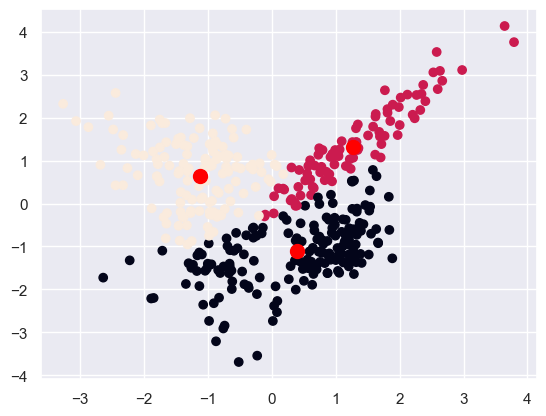

In [65]:
from sklearn.mixture import GaussianMixture

gm2 = GaussianMixture(n_components=3).fit(data2)

gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=gm2.predict(data2))
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

In [66]:
from sklearn.metrics.cluster import rand_score

rand_score(gm2.predict(data2), data2_y)

0.653984962406015

In [67]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(gm2.predict(data2), data2_y)

0.6036416064231807

In [68]:
from sklearn.metrics import silhouette_score

silhouette_score(data2,gm2.predict(data2))

0.4046519622875751

In [69]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data2,  gm2.predict(data2))

0.8209888688520174

### Иерархическая кластеризация

In [70]:
from scipy.cluster import hierarchy

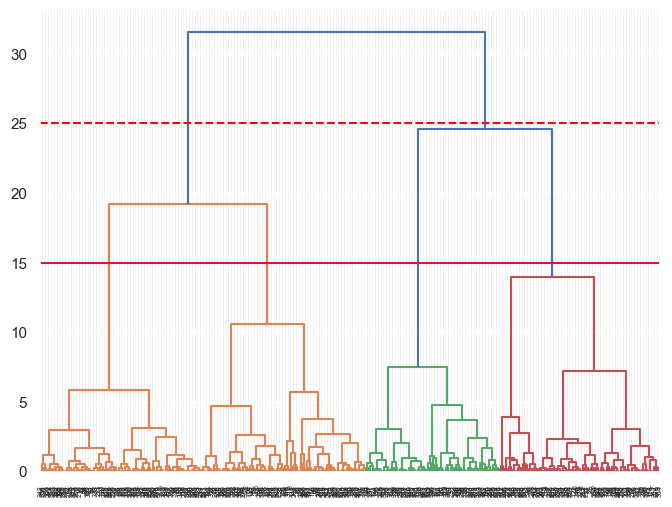

In [71]:
clusters2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters2)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(25, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(15, color='crimson');

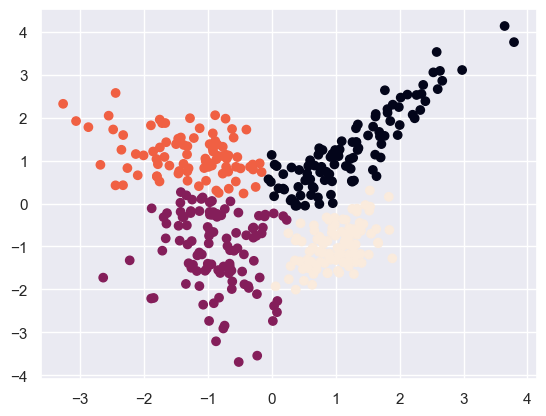

In [72]:
from sklearn.cluster import AgglomerativeClustering

clustering2 = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

### Карты Кохонена

In [73]:
from sklearn_som.som import SOM

In [74]:
iris_som2 = SOM(m=2, n=1, dim=2)
iris_som2.fit(data2)

In [75]:
predictions2 = iris_som2.predict(data2)

In [76]:
predictions2

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

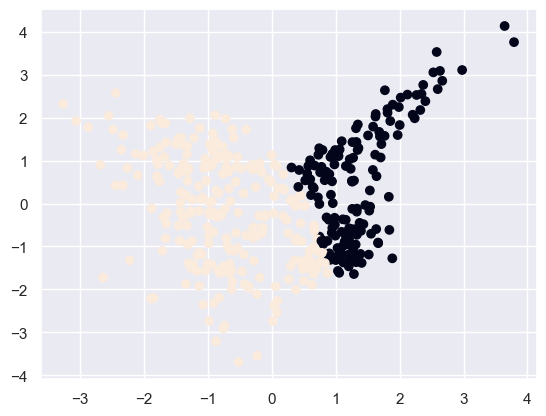

In [77]:
plt.scatter(data2[:,0], data2[:,1], c=predictions2)

## Работа с data3

### Визуализация

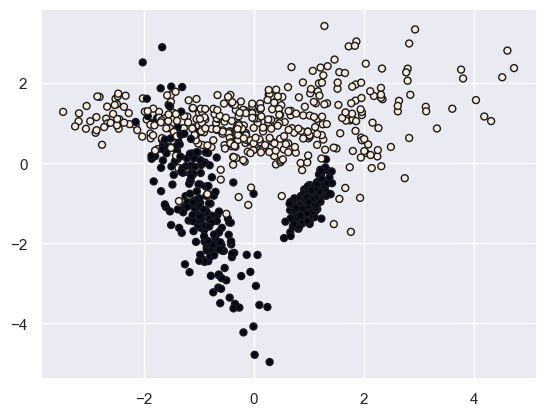

In [78]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

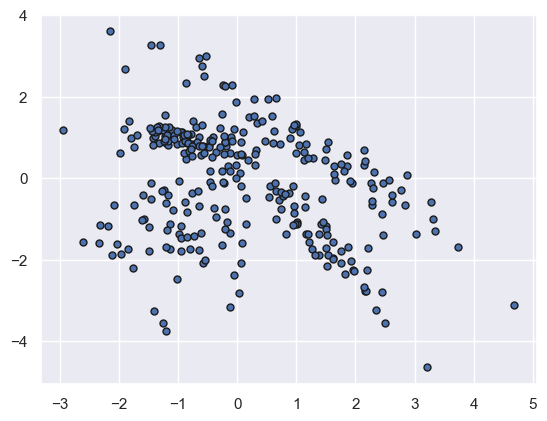

In [79]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

### Кластеризация

#### K-means

In [117]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(2, n_init='auto').fit(data3)

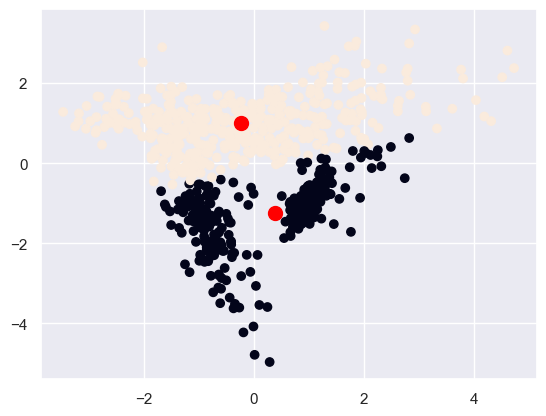

In [118]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

Оценка модели 

In [119]:
from sklearn.metrics.cluster import rand_score

rand_score(kmeans3.labels_, data3_y)

0.7791020025031289

In [120]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(kmeans3.labels_, data3_y)

0.7798828662954967

In [121]:
from sklearn.metrics import silhouette_score

silhouette_score(data3, kmeans3.labels_)

0.3926671219584238

In [122]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data3, kmeans3.labels_)

1.085304932260587

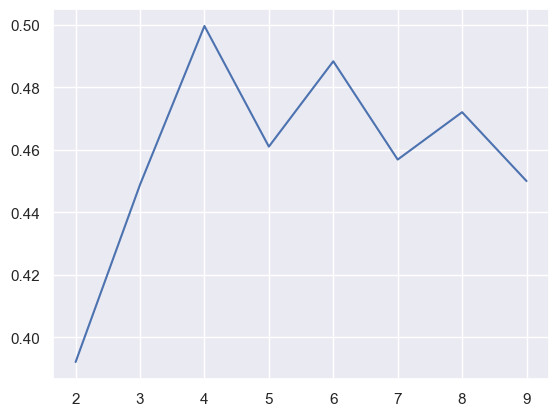

In [123]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

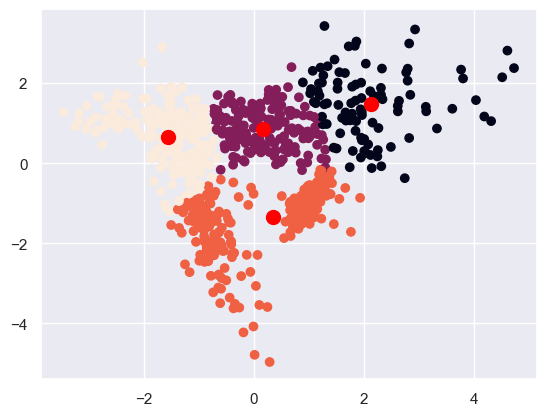

In [124]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(4, n_init='auto').fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

### AffinityPropagation

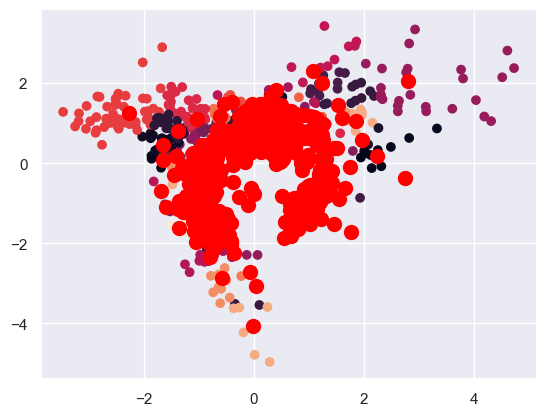

In [125]:
from sklearn.cluster import AffinityPropagation

clustering3 = AffinityPropagation(preference=-42).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

In [126]:
from sklearn.metrics.cluster import rand_score

rand_score(clustering3.labels_, data3_y)

0.5065675844806008

In [127]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(clustering3.labels_, data3_y)

0.1124369004646073

In [128]:
from sklearn.metrics import silhouette_score

silhouette_score(data3, clustering3.labels_)

0.061935113856973104

In [129]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data3, clustering3.labels_)

0.35730720494924784

### DB-SCAN

[-1  0]


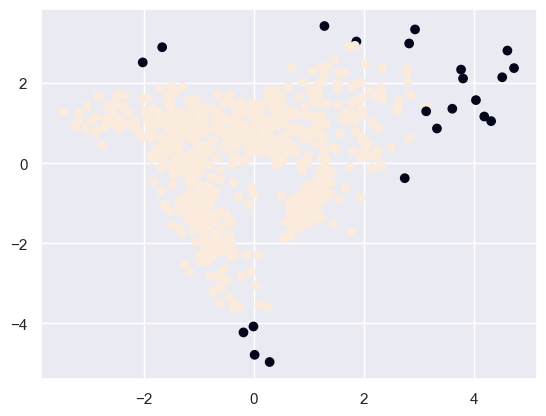

In [130]:
from sklearn.cluster import DBSCAN

dbscan3 = DBSCAN().fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31]


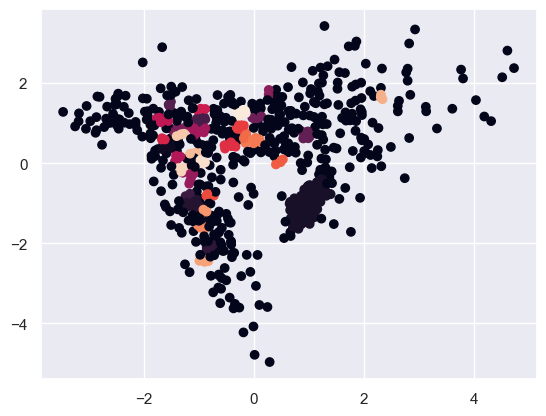

In [131]:
dbscan3 = DBSCAN(eps=0.1, min_samples=4).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [132]:
from sklearn.neighbors import NearestNeighbors

nbrs3 = NearestNeighbors(n_neighbors=4).fit(data3)
distances3, indices3 = nbrs3.kneighbors(data1)
distances3

array([[0.0681432 , 0.24736506, 0.27459437, 0.33291308],
       [0.08268567, 0.08901686, 0.12102202, 0.15301752],
       [0.06937994, 0.07010184, 0.11292135, 0.11726459],
       ...,
       [0.08108136, 0.21140058, 0.30201096, 0.39635955],
       [0.03608128, 0.08184083, 0.11904767, 0.11954657],
       [0.06413485, 0.10262906, 0.11824578, 0.14427788]])

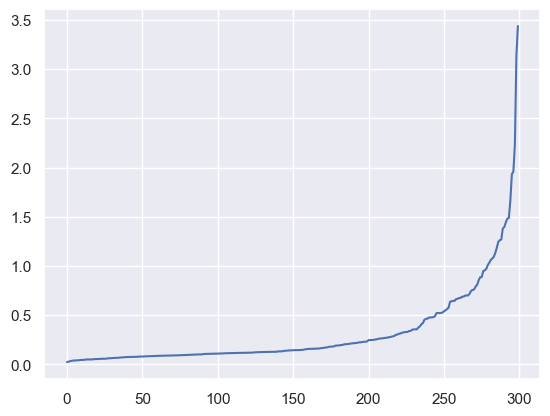

In [133]:
distances3 = np.mean(distances3, axis=1)
distances3 = np.sort(distances3)
# distances3
plt.plot(distances3)

[-1  0]


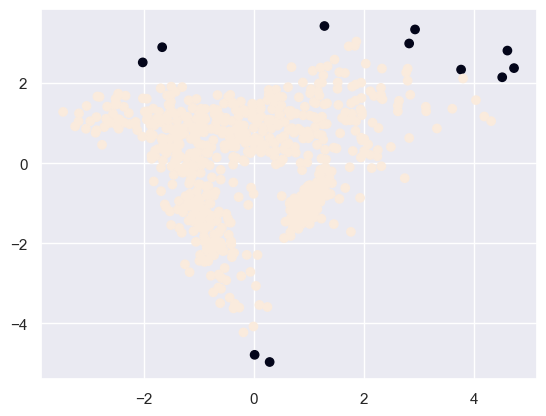

In [135]:
dbscan3 = DBSCAN(eps=0.6, min_samples=4).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [136]:
from sklearn.metrics.cluster import rand_score

rand_score(dbscan3.labels_, data3_y)

0.49940237797246556

In [137]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(dbscan3.labels_, data3_y)

0.6969989056470487

In [138]:
from sklearn.metrics import silhouette_score

silhouette_score(data3, dbscan3.labels_)

0.4896713746641943

In [139]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data3,  dbscan3.labels_)

2.158942381537512

### Gaussian Mixtures, EM

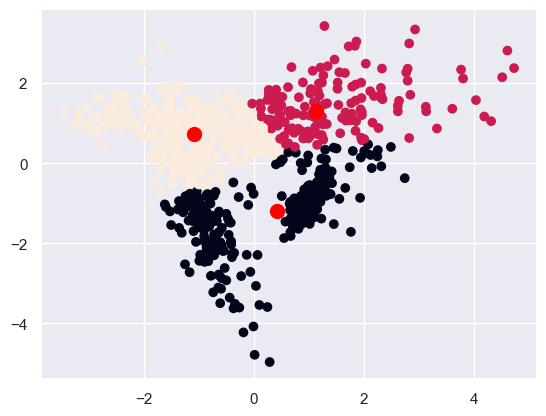

In [140]:
from sklearn.mixture import GaussianMixture

gm3 = GaussianMixture(n_components=3).fit(data3)

gm3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=gm3.predict(data3))
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

In [141]:
from sklearn.metrics.cluster import rand_score

rand_score(gm3.predict(data3), data3_y)

0.6886514392991239

In [142]:
from sklearn.metrics.cluster import fowlkes_mallows_score

fowlkes_mallows_score(gm3.predict(data3), data3_y)

0.6497658630709272

In [143]:
from sklearn.metrics import silhouette_score

silhouette_score(data3,gm3.predict(data3))

0.4395686017378969

In [144]:
from sklearn.metrics.cluster import davies_bouldin_score

davies_bouldin_score(data3,  gm1.predict(data3))

0.8783760273749847

### Иерархическая кластеризация

In [145]:
from scipy.cluster import hierarchy

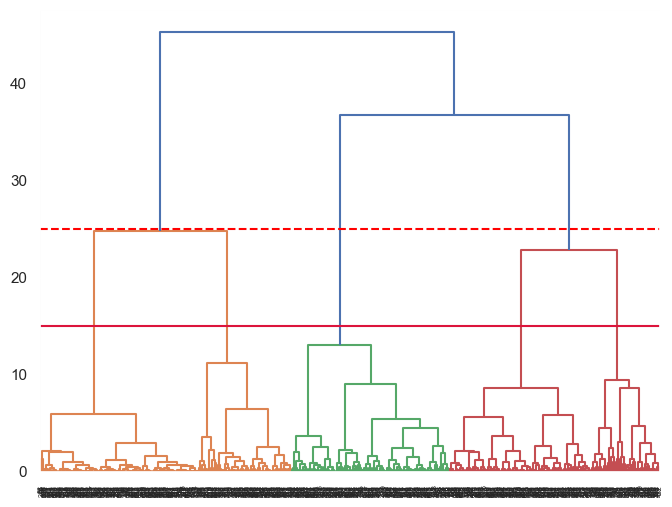

In [146]:
clusters3 = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters3)
# Plotting a horizontal line based on the first biggest distance between clusters
plt.axhline(25, color='red', linestyle='--');
# Plotting a horizontal line based on the second biggest distance between clusters
plt.axhline(15, color='crimson');

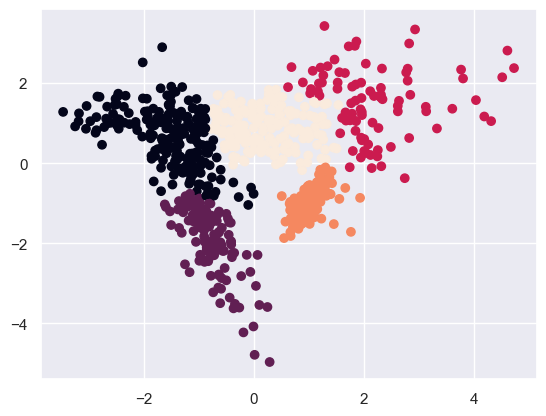

In [147]:
from sklearn.cluster import AgglomerativeClustering

clustering3 = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

### Карты Кохонена

In [148]:
from sklearn_som.som import SOM

In [149]:
iris_som3 = SOM(m=2, n=1, dim=2)
iris_som3.fit(data3)

In [150]:
predictions3 = iris_som3.predict(data3)

In [151]:
predictions3

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,

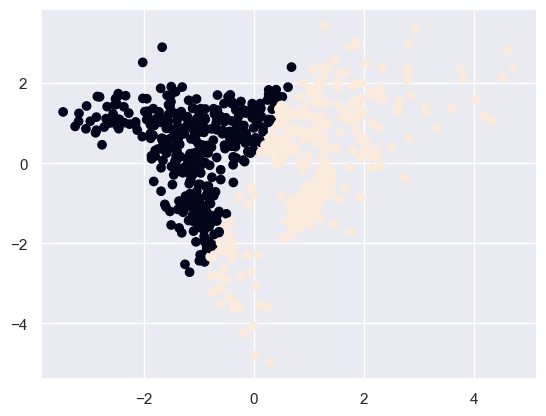

In [153]:
plt.scatter(data3[:,0], data3[:,1], c=predictions3)

# Задание 2

## EDA + предобработка

In [154]:
data = pd.read_csv('../data/DataSet4.csv')

In [155]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,No
62626,62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,No
62627,62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,No
62628,62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,No


In [156]:
data = data.dropna()

In [157]:
data = data.drop("Unnamed: 0",axis = 1)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60603 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             60603 non-null  int64  
 1   Temperature[C]  60603 non-null  float64
 2   Humidity[%]     60603 non-null  float64
 3   TVOC[ppb]       60603 non-null  float64
 4   eCO2[ppm]       60603 non-null  float64
 5   Raw H2          60603 non-null  float64
 6   Raw Ethanol     60603 non-null  int64  
 7   Pressure[hPa]   60603 non-null  float64
 8   PM1.0           60603 non-null  float64
 9   PM2.5           60603 non-null  float64
 10  NC0.5           60603 non-null  float64
 11  NC1.0           60603 non-null  float64
 12  NC2.5           60603 non-null  float64
 13  CNT             60603 non-null  int64  
 14  Fire Alarm      60603 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.4+ MB


In [159]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.060300e+04,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000
mean,1.654792e+09,15.969422,48.530699,1940.224296,670.565731,12942.483507,19754.829381,938.626170,100.456575,184.535487,489.985977,203.690792,80.250339,10504.482121
std,1.101285e+05,14.364021,8.885096,7803.365405,1910.834428,272.409853,609.240337,1.334196,922.971678,1980.884024,4263.976415,2220.198260,1087.865967,7594.776939
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.980000,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.330000,8.795000,1.381500,0.033000,3622.000000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9323.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13109.000000,20079.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17149.500000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [160]:
data= data.rename(columns = {"Fire Alarm" : "Fire_Alarm",
                            "Raw H2" : "Raw_H2",
                            "Raw Ethanol" : "Raw_Ethanol"})

In [161]:
data['Fire_Alarm'] = data['Fire_Alarm'].map({'Yes':1, 'No':0})

In [162]:
outlier = data[['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT', "Fire_Alarm"]]

In [163]:
Q1 = outlier.quantile(0.25)
Q1

Temperature[C]       10.9800
Humidity[%]          47.5300
TVOC[ppb]           130.0000
eCO2[ppm]           400.0000
Raw_H2            12830.0000
Raw_Ethanol       19435.0000
Pressure[hPa]       938.7000
PM1.0                 1.2800
PM2.5                 1.3300
NC0.5                 8.7950
NC1.0                 1.3815
NC2.5                 0.0330
CNT                3622.0000
Fire_Alarm            0.0000
Name: 0.25, dtype: float64

In [164]:
Q3 = outlier.quantile(0.75)
Q3

Temperature[C]       25.410
Humidity[%]          53.240
TVOC[ppb]          1189.000
eCO2[ppm]           438.000
Raw_H2            13109.000
Raw_Ethanol       20079.000
Pressure[hPa]       939.417
PM1.0                 2.090
PM2.5                 2.180
NC0.5                14.420
NC1.0                 2.249
NC2.5                 0.051
CNT               17149.500
Fire_Alarm            1.000
Name: 0.75, dtype: float64

In [165]:
IQR = Q3-Q1

In [167]:
df = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

In [168]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw_H2            0
Raw_Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire_Alarm        0
dtype: int64

In [169]:
pd.crosstab(df['Fire_Alarm'],df['Fire_Alarm'], normalize='all')*100

Fire_Alarm,0,1
Fire_Alarm,,
0,13.745655,0.000000
1,0.000000,86.254345


In [170]:
df = df[["Fire_Alarm",'Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']]

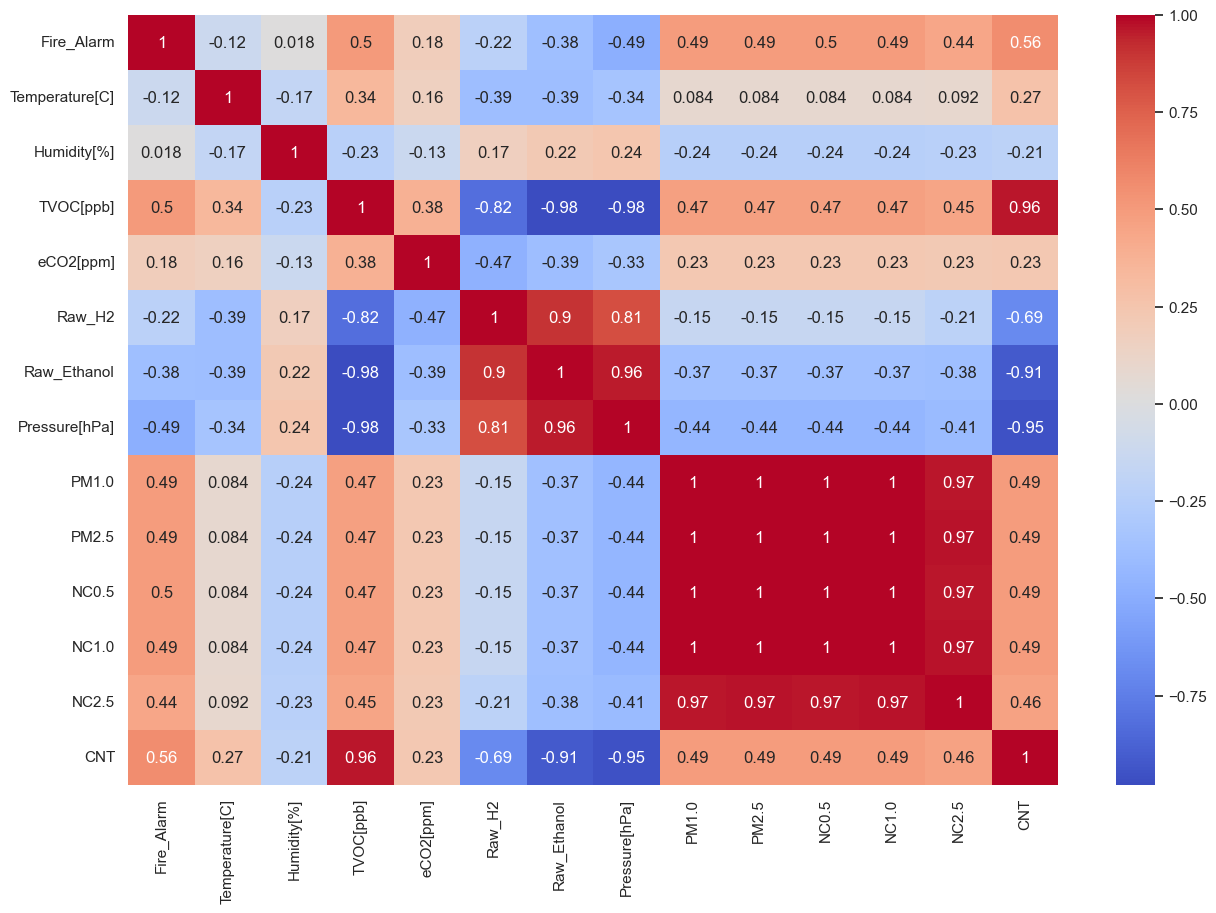

In [171]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

## Разделение выборки

In [186]:
y = df["Fire_Alarm"]
X = df.drop("Fire_Alarm", axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1000)

## Кластеризация

### K-means

In [184]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, n_init='auto').fit(X_test)

In [185]:
plt.scatter(X_test[:,0], X_test[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

TypeError: list indices must be integers or slices, not tuple